# DAML 08 - t-SNE

Michal Grochmal <michal.grochmal@city.ac.uk>

t-distributed Stochastic Neighbor Embedding is a manifold technique created
by Geoffrey Hinton and Laurens van der Maaten.
It uses a probabilistic distribution to measure distances between points in a dataset
(high probability means short distance and low probability long distance).
It then attempts to keep these distances during transformation.

t-SNE is considerably different from a decomposition technique such as PCA:

-   Has no inverse transform (this is often the case with manifold techniques)

-   The number of components is always much smaller than the number of dimensions
    in the original data.  Since this originally is a visualization technique,
    most often you will only see 2 or 3 components

-   Since it is a stochastic technique the result is considerably different
    depending on the initial (random) state, or even the ordering of the input data

We import the usual stuff.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

Let's see how t-SNE performs on the MNIST handwritten digits.

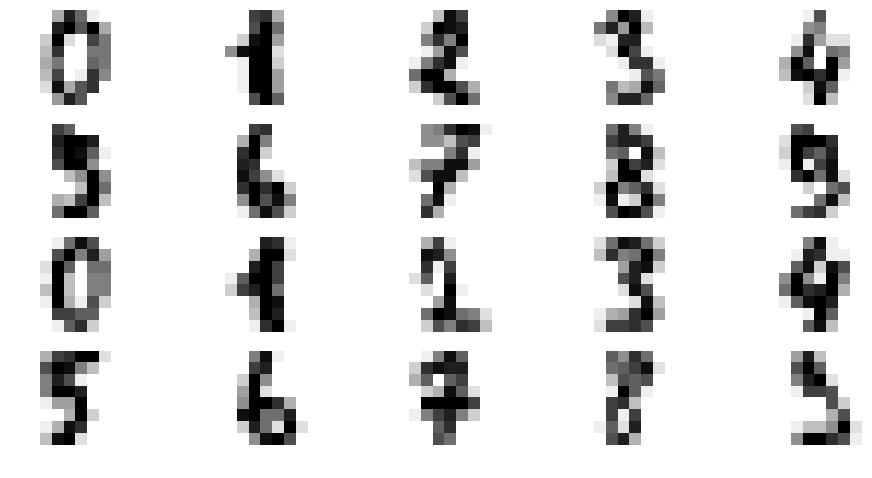

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
sample = digits.images[:20]
fig, axes = plt.subplots(4, 5, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample[i], cmap='binary')
    ax.axis('off')

The t-SNE algorithm in `sklearn` works in a similar way as any other preprocessor,
We give it the hyperparameters - here just the number of components - and `fit` the model.
We use `fit_transform` to already transform the data.

The following takes a while to run, t-SNE is computationally expensive.

In [3]:
from sklearn.manifold import TSNE
proj = TSNE(n_components=2).fit_transform(digits.data)

As we did with PCA we plot the groups output by t-SNE,
and we take the known labels and color the groups accordingly.

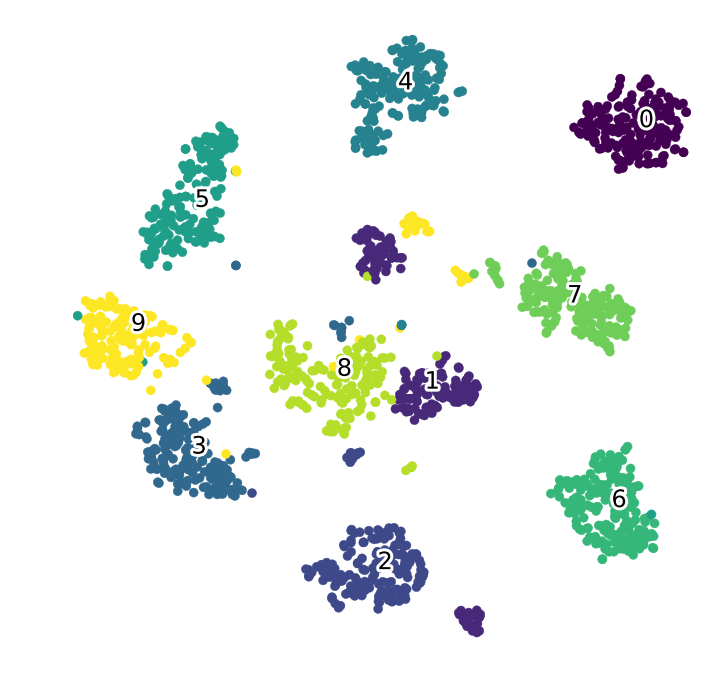

In [4]:
import matplotlib.patheffects as mplpf
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap='viridis')
ax.axis('off')
for i in range(10):
    xtext, ytext = np.median(proj[digits.target == i, :], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([
        mplpf.Stroke(linewidth=6, foreground='white'), mplpf.Normal()])

The separation between classes is pretty good.
t-SNE can find non-linear relations therefore it performs
much better than PCA on a non-linear dataset.
That said, t-SNE is not without its own flaws.
For example, the algorithm is very sensitive to data ordering,
and we can test it out by reordering our data.

Digits data is ordered as several groups from 0 to 9.
We will change that ordering: first all zeros, then all ones, and so on;
and run t-SNE with that ordering.

In [5]:
X = np.vstack([digits.data[digits.target==i] for i in range(10)])
y = np.hstack([digits.target[digits.target==i] for i in range(10)])
proj_ordered = TSNE(n_components=2).fit_transform(X)

In the same way we plotted it before we do the ordered digits projection.
We can then compare both plots.

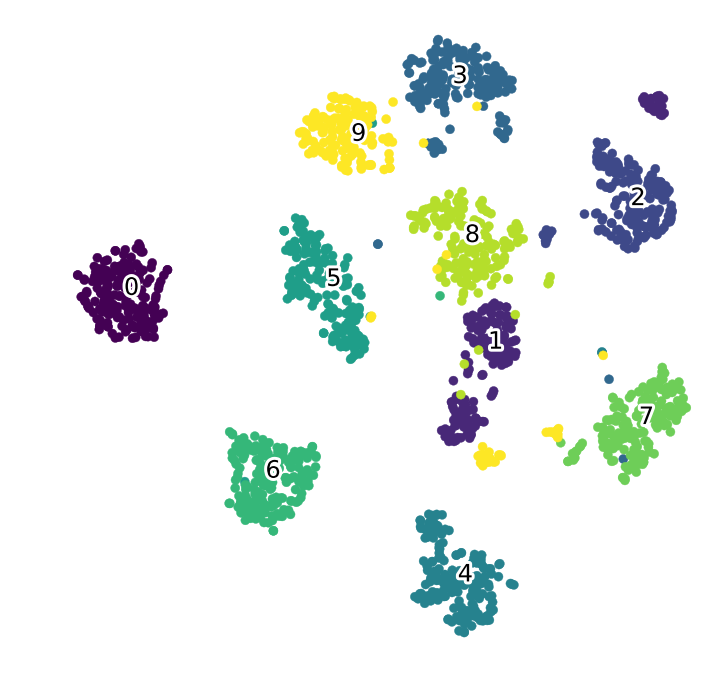

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(proj_ordered[:, 0], proj_ordered[:, 1], c=y, cmap='viridis')
ax.axis('off')
for i in range(10):
    xtext, ytext = np.median(proj_ordered[y == i, :], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([
        mplpf.Stroke(linewidth=6, foreground='white'), mplpf.Normal()])

The class separation is still good but the plot looks very different.
That is the big disadvantage of t-SNE, the algorithm is not trivially reproducible.
That said, t-SNE will certainly be a better preprocessing technique than PCA for thsi dataset.